In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
import random
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree # type: ignore
from sklearn.ensemble import RandomForestClassifier # type: ignore
import statsmodels.api as sm # type: ignore
from sklearn.metrics import mean_absolute_error, mean_squared_error # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [2]:
data = pd.read_csv('bank_marketing_training')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [4]:
data.shape

(26874, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26874 entries, 0 to 26873
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  26874 non-null  int64  
 1   job                  26874 non-null  object 
 2   marital              26874 non-null  object 
 3   education            26874 non-null  object 
 4   default              26874 non-null  object 
 5   housing              26874 non-null  object 
 6   loan                 26874 non-null  object 
 7   contact              26874 non-null  object 
 8   month                26874 non-null  object 
 9   day_of_week          26874 non-null  object 
 10  duration             26874 non-null  int64  
 11  campaign             26874 non-null  int64  
 12  days_since_previous  26874 non-null  int64  
 13  previous             26874 non-null  int64  
 14  previous_outcome     26874 non-null  object 
 15  emp.var.rate         26874 non-null 

In [6]:
data.isnull().sum() #nothing is null so let's keep going

age                    0
job                    0
marital                0
education              0
default                0
housing                0
loan                   0
contact                0
month                  0
day_of_week            0
duration               0
campaign               0
days_since_previous    0
previous               0
previous_outcome       0
emp.var.rate           0
cons.price.idx         0
cons.conf.idx          0
euribor3m              0
nr.employed            0
response               0
dtype: int64

In [7]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
26869    False
26870    False
26871    False
26872    False
26873    False
Length: 26874, dtype: bool

In [8]:
data.duplicated().sum()

np.int64(4)

In [9]:
duplicated_rows = data[data.duplicated()]
duplicated_rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
8049,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228,no
16491,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195,no
18627,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099,no
21221,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099,no


In [10]:
data = data.drop(index=[8049,16491,18627,21221])

In [11]:
data.duplicated().sum()


np.int64(0)

In [12]:
data.shape

(26870, 21)

In [13]:
data.describe()

,age,duration,campaign,days_since_previous,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,26870.000000,26870.000000,26870.000000,26870.000000,26870.000000,26870.000000,26870.000000,26870.000000,26870.000000,26870.000000
mean,39.988723,257.755229,2.563119,962.709230,0.171083,0.086651,93.575839,-40.481072,3.627978,5167.105210
std,10.400527,258.990971,2.748901,186.337889,0.487689,1.569728,0.578945,4.626514,1.731945,72.082346
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000
max,91.000000,4918.000000,43.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000


In [14]:
from scipy import stats

In [15]:
data['age_z'] = stats.zscore(data['age'])

In [16]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_z
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1.539496
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1.635647
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0.097235
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,-1.441177
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,-1.056574


In [17]:
data.sort_index()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_z
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1.539496
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1.635647
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0.097235
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,-1.441177
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,-1.056574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26869,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,no,-0.383519
26870,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,-0.287368
26871,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,9,1,success,-1.1,94.767,-50.8,1.028,4963,no,-1.056574
26872,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,3.174059


In [18]:
data.sort_values(['age_z'], ascending = False)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_z
24840,91,retired,married,university.degree,no,no,yes,cellular,sep,wed,...,999,0,nonexistent,-3.4,92.379,-29.8,0.781,5017,no,4.904773
24833,91,retired,married,university.degree,no,yes,yes,cellular,sep,wed,...,999,2,failure,-3.4,92.379,-29.8,0.781,5017,no,4.904773
26520,89,retired,divorced,basic.4y,no,yes,no,cellular,sep,tue,...,999,0,nonexistent,-1.1,94.199,-37.5,0.881,4963,yes,4.712472
26015,89,retired,divorced,basic.4y,no,no,no,cellular,jun,mon,...,999,0,nonexistent,-1.7,94.055,-39.8,0.720,4991,yes,4.712472
18179,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099,no,4.616321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19802,18,student,single,basic.4y,no,yes,yes,cellular,apr,thu,...,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099,no,-2.114233
24553,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,999,1,failure,-2.9,92.201,-31.4,0.869,5076,yes,-2.210383
24255,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,4,2,success,-2.9,92.201,-31.4,0.884,5076,no,-2.210383
24540,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,4,2,success,-2.9,92.201,-31.4,0.869,5076,no,-2.210383


In [19]:
data_outliers = data.query('age_z > 3 | age_z < -3')
data_outliers

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_z
18166,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,999,1,failure,-1.8,92.843,-50.0,1.687,5099,no,3.174059
18179,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099,no,4.616321
18181,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099,yes,4.616321
18183,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099,yes,4.616321
18186,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099,yes,4.616321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26735,84,retired,divorced,basic.4y,unknown,yes,no,cellular,oct,fri,...,999,0,nonexistent,-1.1,94.601,-49.5,0.993,4963,no,4.231718
26739,74,retired,divorced,basic.4y,no,yes,no,cellular,oct,mon,...,999,0,nonexistent,-1.1,94.601,-49.5,1.000,4963,no,3.270210
26740,74,retired,divorced,basic.4y,no,yes,no,cellular,oct,mon,...,3,2,success,-1.1,94.601,-49.5,1.000,4963,no,3.270210
26750,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,999,2,failure,-1.1,94.601,-49.5,1.016,4963,yes,3.943266


In [20]:
outlier_indices = data_outliers.index

In [21]:
data = data.drop(outlier_indices)

In [22]:
print(26870-26642)
#verifies that outliers are gone!

228


In [23]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_z
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1.539496
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1.635647
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0.097235
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,-1.441177
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,-1.056574


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26642 entries, 0 to 26873
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  26642 non-null  int64  
 1   job                  26642 non-null  object 
 2   marital              26642 non-null  object 
 3   education            26642 non-null  object 
 4   default              26642 non-null  object 
 5   housing              26642 non-null  object 
 6   loan                 26642 non-null  object 
 7   contact              26642 non-null  object 
 8   month                26642 non-null  object 
 9   day_of_week          26642 non-null  object 
 10  duration             26642 non-null  int64  
 11  campaign             26642 non-null  int64  
 12  days_since_previous  26642 non-null  int64  
 13  previous             26642 non-null  int64  
 14  previous_outcome     26642 non-null  object 
 15  emp.var.rate         26642 non-null  floa

In [25]:
data.shape

(26642, 22)

In [26]:
distinct_job_values = data['job'].unique()
sorted_values = sorted(distinct_job_values)
print(sorted_values)

['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']


In [27]:
#Dictionaires!!
data['job_numeric'] = data['job']

dict_job = {'job_numeric': {
    'admin.': 1,
    'blue-collar': 2,
    'entrepreneur': 3,
    'housemaid': 4, 
    'management': 5, 
    'retired': 6, 
    'self-employed': 7,  
    'services': 8, 
    'student': 9,
    'technician': 10, 
    'unemployed': 11,
    'unknown': -1}}
data.replace(dict_job, inplace=True)

/var/folders/xg/9_zxrtsn0ll10hckyb7z5l780000gn/T/ipykernel_7423/1011531389.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(dict_job, inplace=True)


In [28]:
distinct_martial_values = data['marital'].unique()
sorted_values = sorted(distinct_martial_values)
print(sorted_values)

['divorced', 'married', 'single', 'unknown']


In [29]:
data['marital_numeric'] = data['marital']  
dict_marital = {'marital_numeric': {
    'divorced': 1, 
    'married': 2, 
    'single': 3, 
    'unknown': -1
}}
data.replace(dict_marital, inplace=True)

/var/folders/xg/9_zxrtsn0ll10hckyb7z5l780000gn/T/ipykernel_7423/1651662343.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(dict_marital, inplace=True)


In [30]:
distinct_education = data['education'].unique()
sorted_values = sorted(distinct_education)
print(sorted_values)

['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']


In [31]:
data['education_numeric'] = data['education']
dict_education = {'education_numeric': {
    'basic.4y': 1, 
    'basic.6y': 2, 
    'basic.9y': 3, 
    'high.school': 4, 
    'illiterate': 5, 
    'professional.course': 6, 
    'university.degree': 7, 
    'unknown': -1
}}
data.replace(dict_education, inplace=True)

/var/folders/xg/9_zxrtsn0ll10hckyb7z5l780000gn/T/ipykernel_7423/949746489.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(dict_education, inplace=True)


In [32]:
distinct_default = data['default'].unique()
sorted_values = sorted(distinct_default)
print(sorted_values)

['no', 'unknown', 'yes']


In [33]:
data['default_numeric'] = data['default']
dict_default = {'default_numeric': {
    'no': 0, 
    'yes': 1, 
    'unknown': -1       
}}
data.replace(dict_default, inplace=True)

/var/folders/xg/9_zxrtsn0ll10hckyb7z5l780000gn/T/ipykernel_7423/2318688810.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(dict_default, inplace=True)


In [34]:
distinct_housing = data['housing'].unique()
sorted_values = sorted(distinct_housing)
print(sorted_values)

['no', 'unknown', 'yes']


In [35]:
data['housing_numeric'] = data['housing']
dict_housing = {'housing_numeric': {
    'no': 0, 
    'yes': 1, 
    'unknown': -1       
}}
data.replace(dict_housing, inplace=True)

/var/folders/xg/9_zxrtsn0ll10hckyb7z5l780000gn/T/ipykernel_7423/1389628405.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(dict_housing, inplace=True)


In [36]:
distinct_loan = data['loan'].unique()
sorted_values = sorted(distinct_loan)
print(sorted_values)

['no', 'unknown', 'yes']


In [37]:
data['loan_numeric'] = data['loan']
dict_loan = {'loan_numeric': {
   'no': 0, 
    'yes': 1, 
    'unknown': -1  
}}
data.replace(dict_loan, inplace=True)

/var/folders/xg/9_zxrtsn0ll10hckyb7z5l780000gn/T/ipykernel_7423/2497292788.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(dict_loan, inplace=True)


In [38]:
distinct_contact = data['contact'].unique()
sorted_values = sorted(distinct_contact)
print(sorted_values)

['cellular', 'telephone']


In [39]:
data['contact_numeric'] = data['contact']
dict_contact = {'contact_numeric': {
    'cellular': 1, 
    'telephone': 2
}}
data.replace(dict_contact, inplace=True)

/var/folders/xg/9_zxrtsn0ll10hckyb7z5l780000gn/T/ipykernel_7423/3784166183.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(dict_contact, inplace=True)


In [40]:
distinct_month = data['month'].unique()
print(distinct_month)

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


In [41]:
data['month_numeric'] = data['month']
dict_month = {'month_numeric': {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
    }}
data.replace(dict_month, inplace=True)


/var/folders/xg/9_zxrtsn0ll10hckyb7z5l780000gn/T/ipykernel_7423/2384235848.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(dict_month, inplace=True)


In [42]:
distinct_day_of_week = data['day_of_week'].unique()
print(distinct_day_of_week)

['mon' 'tue' 'wed' 'thu' 'fri']


In [43]:
data['day_of_week_numeric'] = data['day_of_week']
dict_day_of_week = {'day_of_week_numeric': {
    'mon': 0, 
    'tue': 1, 
    'wed': 2, 
    'thu': 3, 
    'fri': 4
}}
data.replace(dict_day_of_week, inplace=True)

/var/folders/xg/9_zxrtsn0ll10hckyb7z5l780000gn/T/ipykernel_7423/1358617438.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(dict_day_of_week, inplace=True)


In [44]:
data['previous_outcome_numeric'] = data['previous_outcome']
dict_previous_outcome = {'previous_outcome_numeric': {
    'failure': 0,
    'success': 1, 
    'nonexistent': -1
}}
data.replace(dict_previous_outcome, inplace=True)

/var/folders/xg/9_zxrtsn0ll10hckyb7z5l780000gn/T/ipykernel_7423/650144388.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(dict_previous_outcome, inplace=True)


In [45]:
data['response_numeric'] = data['response']
dict_response = {'response_numeric': {
    'no': 0, 
    'yes': 1
}}
data.replace(dict_response, inplace=True)

/var/folders/xg/9_zxrtsn0ll10hckyb7z5l780000gn/T/ipykernel_7423/2610149182.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(dict_response, inplace=True)


In [46]:
data_numeric = data.copy()
data_numeric.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'previous_outcome', 'response'], axis = 1, inplace=True)
data.drop(['job_numeric', 'marital_numeric', 'education_numeric', 'default_numeric', 'housing_numeric', 'loan_numeric', 'contact_numeric', 'month_numeric', 'day_of_week_numeric', 'previous_outcome_numeric', 'response_numeric'], axis = 1, inplace=True)


In [47]:
data_numeric.head()

,age,duration,campaign,days_since_previous,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_numeric,education_numeric,default_numeric,housing_numeric,loan_numeric,contact_numeric,month_numeric,day_of_week_numeric,previous_outcome_numeric,response_numeric
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191,...,2,1,0,0,0,2,5,0,-1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191,...,2,4,-1,0,0,2,5,0,-1,0
2,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191,...,2,-1,-1,0,0,2,5,0,-1,0
3,25,222,1,999,0,1.1,93.994,-36.4,4.857,5191,...,3,4,0,1,0,2,5,0,-1,0
4,29,137,1,999,0,1.1,93.994,-36.4,4.857,5191,...,3,4,0,0,1,2,5,0,-1,0


In [48]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_z
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1.539496
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1.635647
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0.097235
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,-1.441177
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,-1.056574


In [49]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26642 entries, 0 to 26873
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       26642 non-null  int64  
 1   duration                  26642 non-null  int64  
 2   campaign                  26642 non-null  int64  
 3   days_since_previous       26642 non-null  int64  
 4   previous                  26642 non-null  int64  
 5   emp.var.rate              26642 non-null  float64
 6   cons.price.idx            26642 non-null  float64
 7   cons.conf.idx             26642 non-null  float64
 8   euribor3m                 26642 non-null  float64
 9   nr.employed               26642 non-null  int64  
 10  age_z                     26642 non-null  float64
 11  job_numeric               26642 non-null  int64  
 12  marital_numeric           26642 non-null  int64  
 13  education_numeric         26642 non-null  int64  
 14  default_num

In [50]:
corr = data_numeric.corr()
corr.style.background_gradient(cmap='pink')

,age,duration,campaign,days_since_previous,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_z,job_numeric,marital_numeric,education_numeric,default_numeric,housing_numeric,loan_numeric,contact_numeric,month_numeric,day_of_week_numeric,previous_outcome_numeric,response_numeric
age,1.000000,-0.005014,0.019226,0.006325,-0.013561,0.053663,0.021951,0.112468,0.068263,0.051579,1.000000,-0.025391,-0.380016,-0.135257,-0.183857,-0.002824,0.000010,0.027973,0.073244,-0.017408,-0.008141,-0.016449
duration,-0.005014,1.000000,-0.070710,-0.043013,0.014663,-0.027675,0.000516,-0.003973,-0.030241,-0.042131,-0.005014,-0.006193,0.010362,-0.017092,0.009984,-0.006072,0.007947,-0.027132,-0.017261,0.007074,0.023022,0.404922
campaign,0.019226,-0.070710,1.000000,0.049970,-0.076445,0.145856,0.124984,-0.013209,0.130076,0.140022,0.019226,-0.004967,-0.011678,-0.002916,-0.026029,-0.003904,0.010237,0.075078,-0.030671,0.011892,-0.083827,-0.061550
days_since_previous,0.006325,-0.043013,0.049970,1.000000,-0.578315,0.269821,0.082157,-0.083569,0.294904,0.369722,0.006325,-0.030719,-0.046120,-0.028830,-0.081370,-0.017468,0.002553,0.116899,-0.069876,0.009702,-0.738810,-0.315748
previous,-0.013561,0.014663,-0.076445,-0.578315,1.000000,-0.424168,-0.215781,-0.061006,-0.456053,-0.501199,-0.013561,0.025066,0.042982,0.024252,0.102425,0.020091,-0.008152,-0.214442,0.063247,-0.000872,0.871096,0.218895
emp.var.rate,0.053663,-0.027675,0.145856,0.269821,-0.424168,1.000000,0.778055,0.217230,0.972686,0.908572,0.053663,-0.015109,-0.086248,-0.046294,-0.202563,-0.062039,0.003501,0.385821,0.065392,0.000140,-0.457509,-0.290473
cons.price.idx,0.021951,0.000516,0.124984,0.082157,-0.215781,0.778055,1.000000,0.072928,0.694132,0.530558,0.021951,-0.026469,-0.049823,-0.102387,-0.169986,-0.087315,-0.010740,0.589340,-0.150443,-0.001993,-0.268010,-0.136327
cons.conf.idx,0.112468,-0.003973,-0.013209,-0.083569,-0.061006,0.217230,0.072928,1.000000,0.298281,0.121283,0.112468,0.045160,-0.028106,0.057072,-0.029732,-0.035290,-0.017765,0.259264,0.249928,0.004403,-0.052551,0.045232
euribor3m,0.068263,-0.030241,0.130076,0.294904,-0.456053,0.972686,0.694132,0.298281,1.000000,0.945007,0.068263,-0.014889,-0.095735,-0.038199,-0.194427,-0.061483,0.000837,0.393331,0.169504,-0.000804,-0.477501,-0.298170
nr.employed,0.051579,-0.042131,0.140022,0.369722,-0.501199,0.908572,0.530558,0.121283,0.945007,1.000000,0.051579,-0.022266,-0.094933,-0.034285,-0.189298,-0.046619,0.007337,0.262626,0.141544,0.002726,-0.506874,-0.343770


<function matplotlib.pyplot.show(close=None, block=None)>

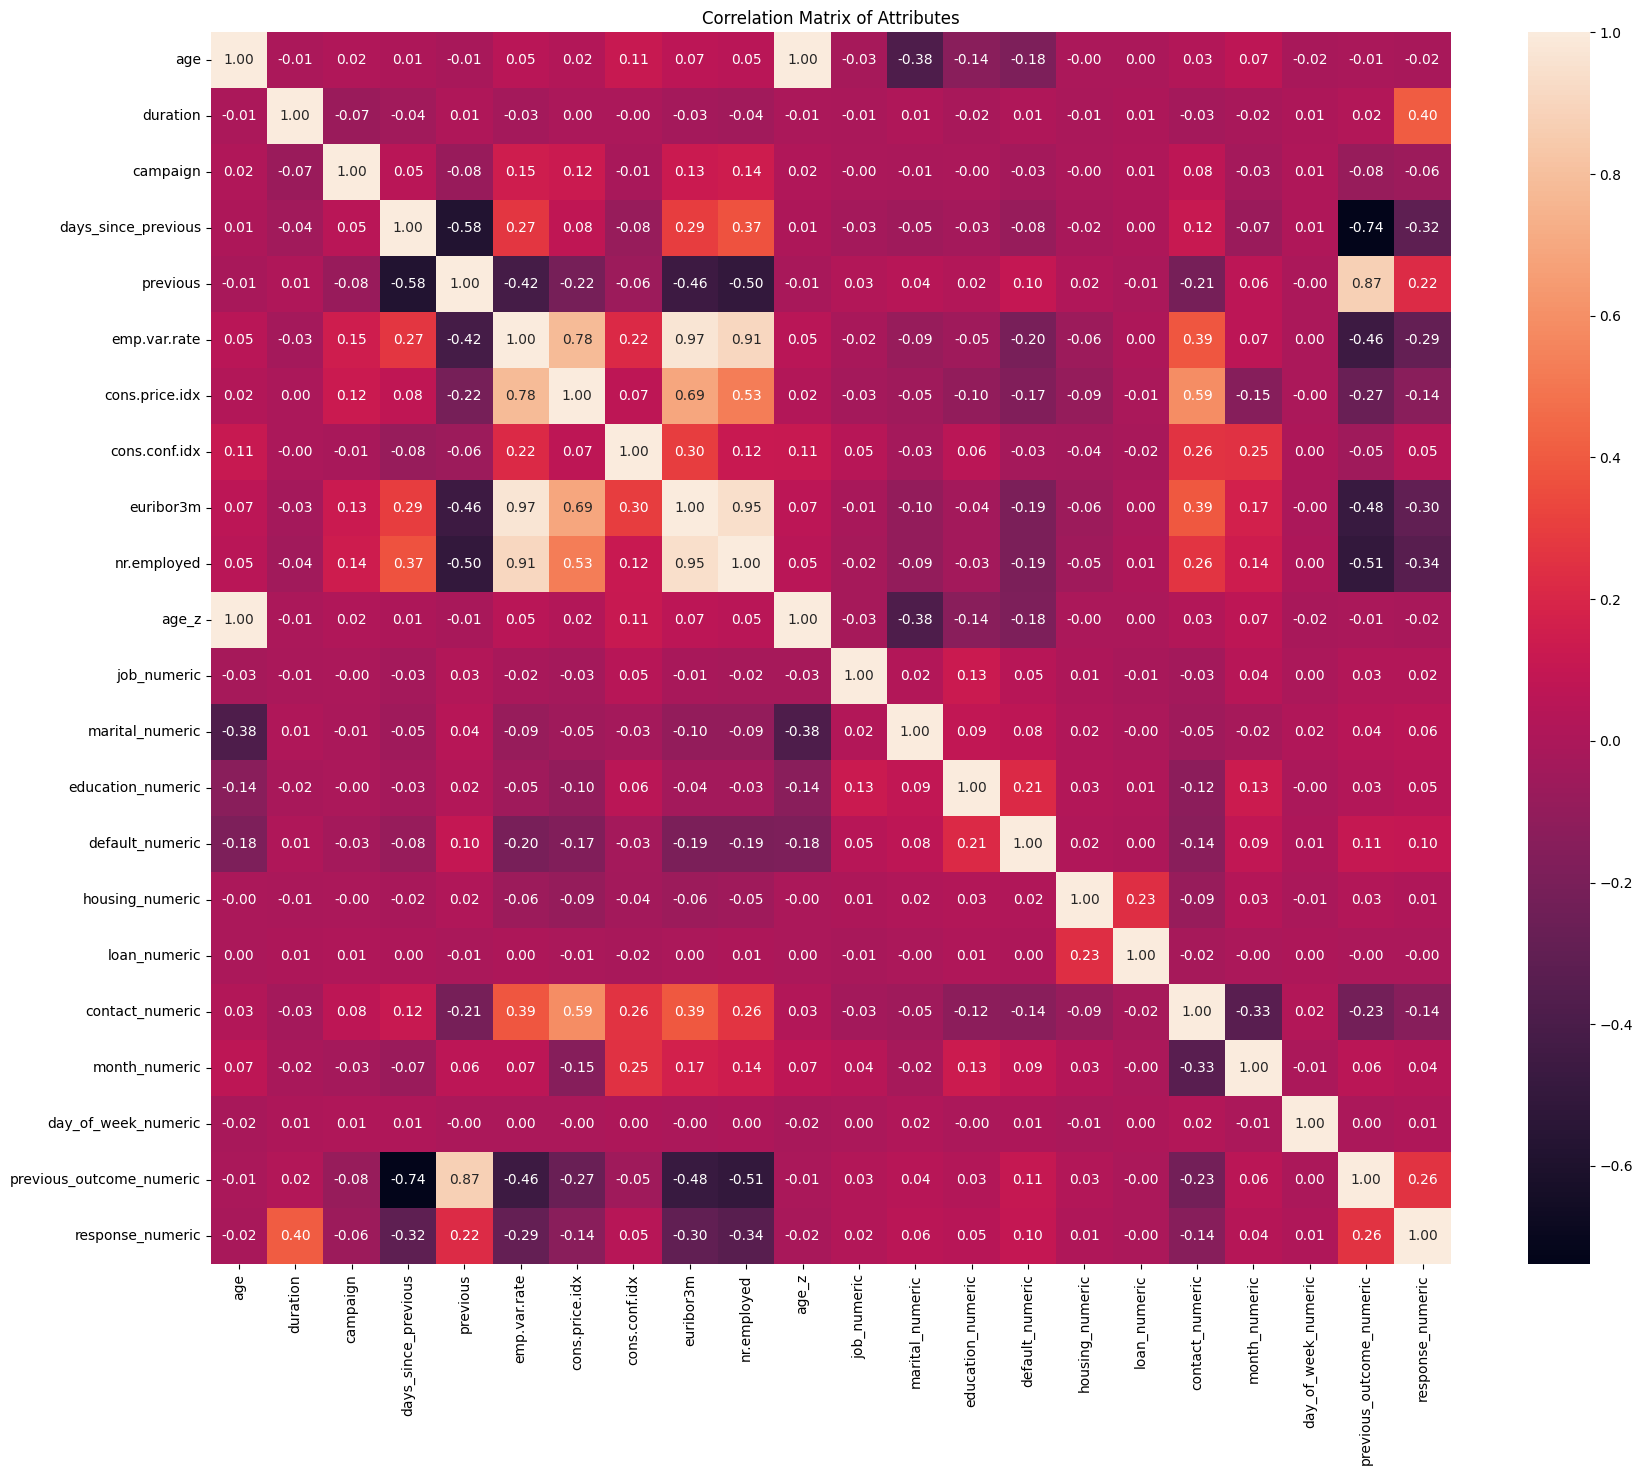

In [51]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt= '.2f')
plt.title('Correlation Matrix of Attributes')
plt.show

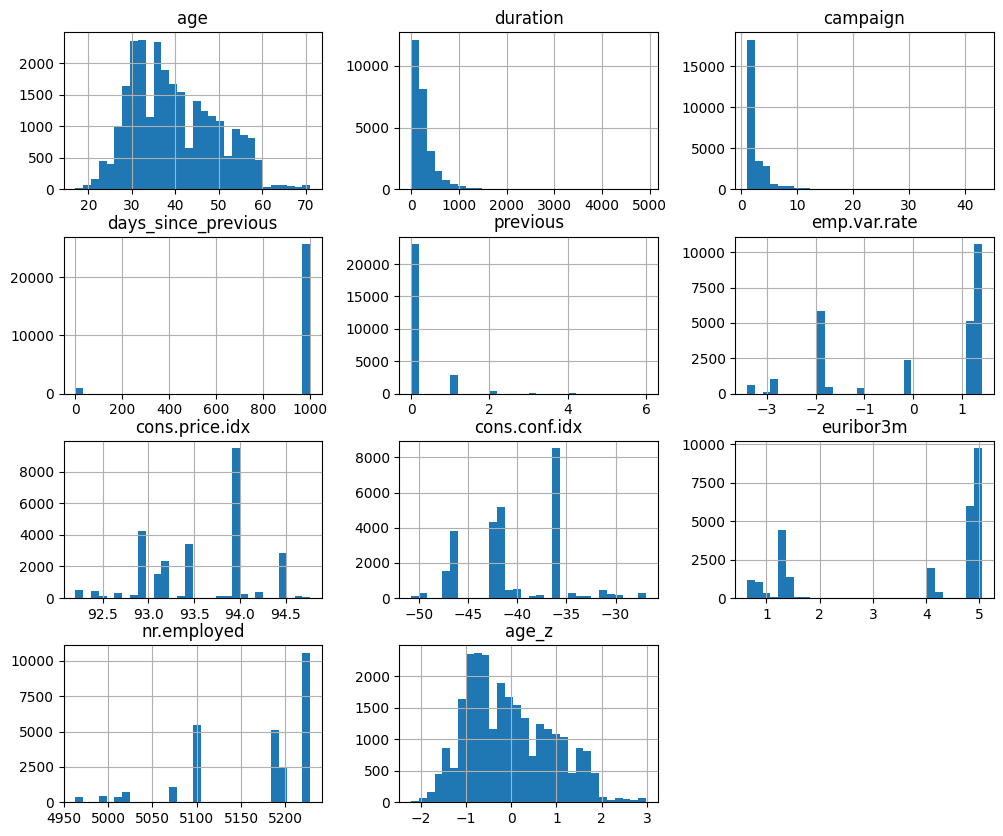

In [52]:
data.hist(figsize=(12, 10), bins=30)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

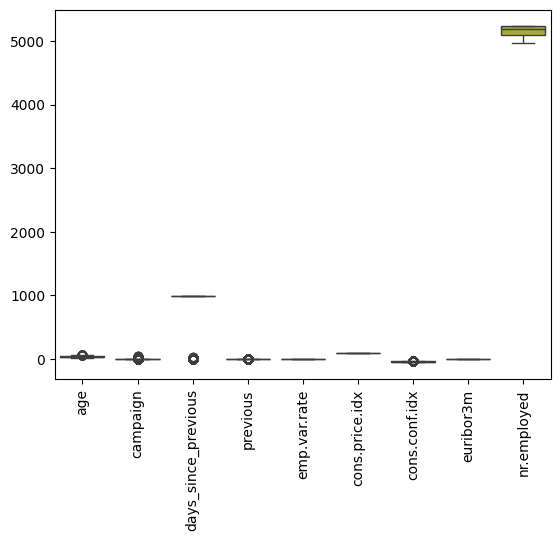

In [53]:
sns.boxplot(data=data[['age', 'campaign', 'days_since_previous', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']])
plt.xticks(rotation=90)
plt.show

In [54]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'previous_outcome']
for feature in categorical_features:
    print(data[feature].value_counts())

job
admin.           6754
blue-collar      6051
technician       4437
services         2580
management       1886
retired           932
self-employed     918
entrepreneur      914
housemaid         698
unemployed        667
student           598
unknown           207
Name: count, dtype: int64
marital
married     16043
single       7568
divorced     2974
unknown        57
Name: count, dtype: int64
education
university.degree      7915
high.school            6113
basic.9y               4039
professional.course    3405
basic.4y               2563
basic.6y               1492
unknown                1103
illiterate               12
Name: count, dtype: int64
default
no         21011
unknown     5628
yes            3
Name: count, dtype: int64
housing
yes        13837
no         12137
unknown      668
Name: count, dtype: int64
loan
no         21870
yes         4104
unknown      668
Name: count, dtype: int64
contact
cellular     16791
telephone     9851
Name: count, dtype: int64
month
may    904

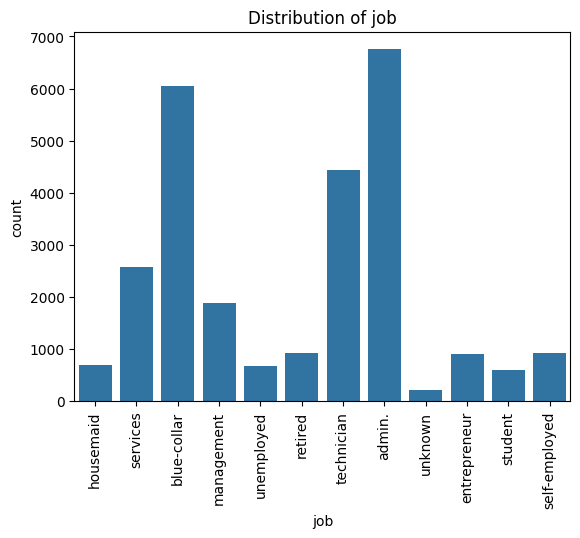

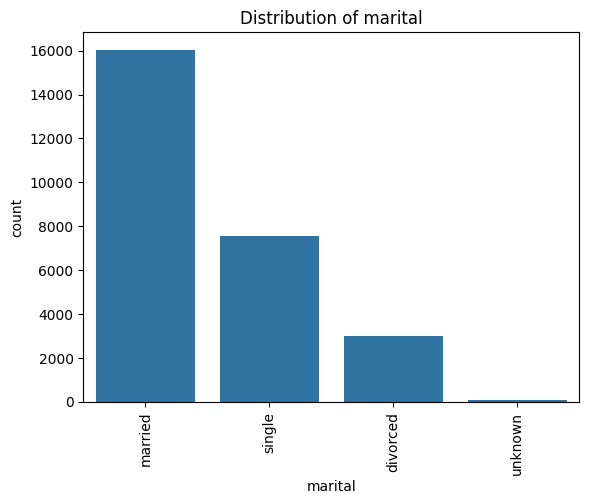

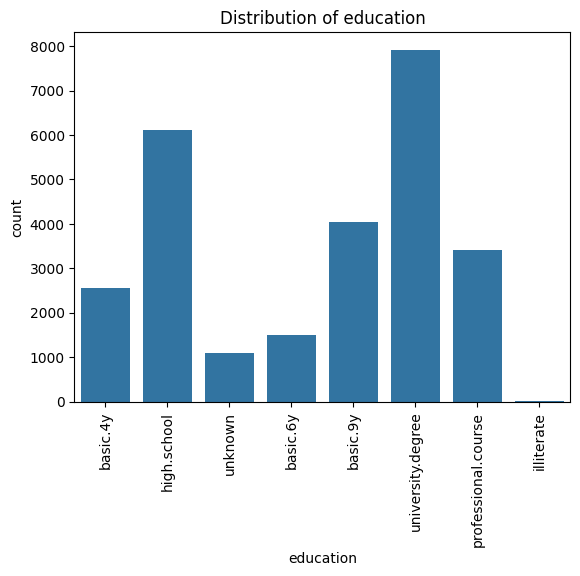

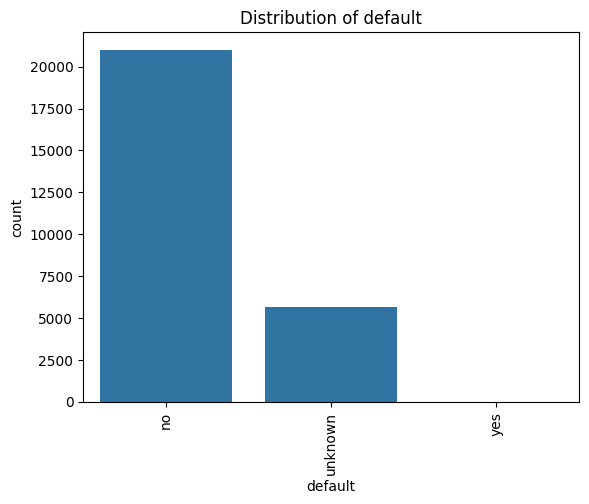

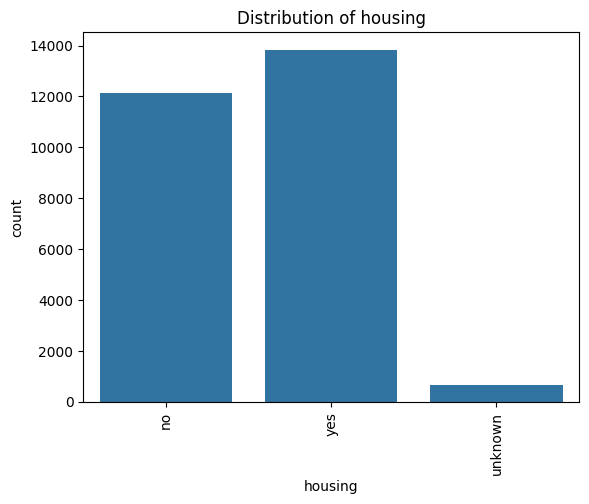

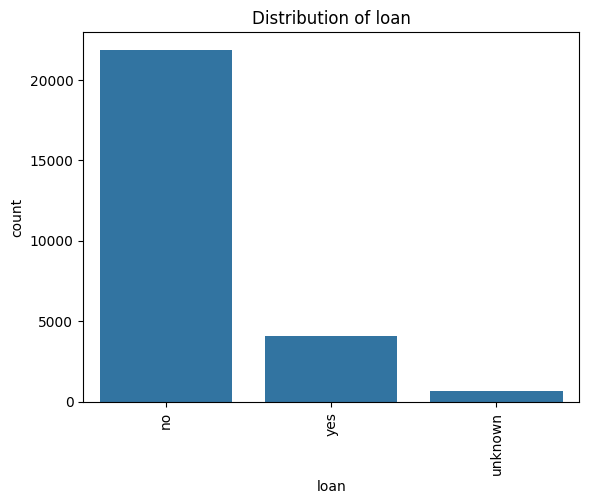

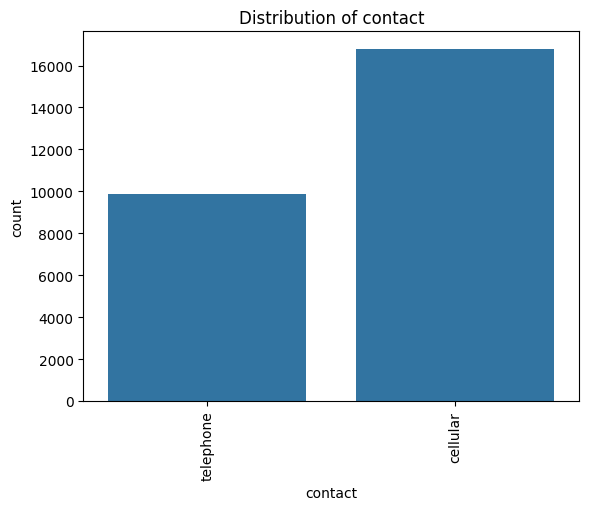

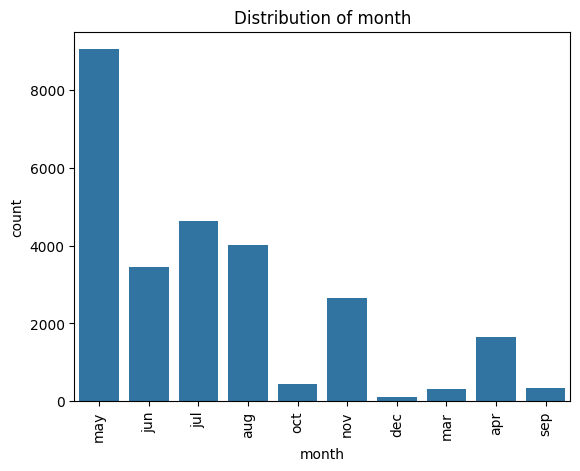

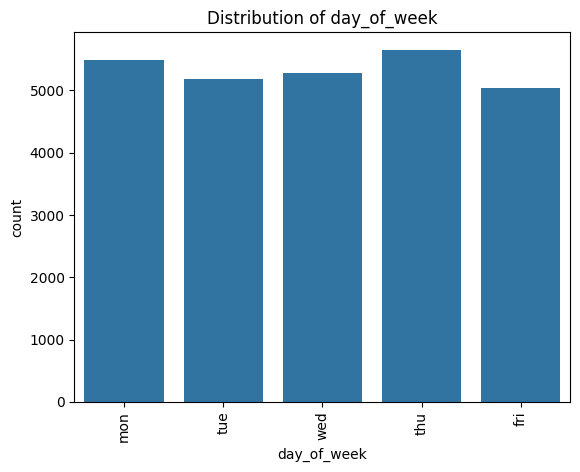

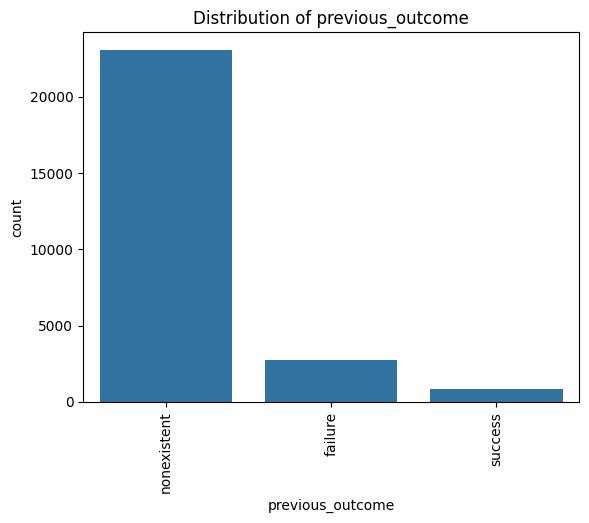

In [55]:
for feature in categorical_features:
    sns.countplot(data=data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()

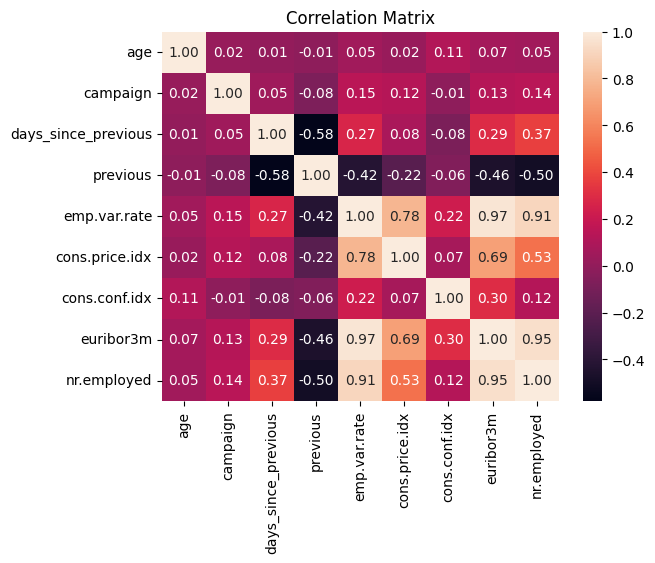

In [56]:
corr = data[['age', 'campaign', 'days_since_previous', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

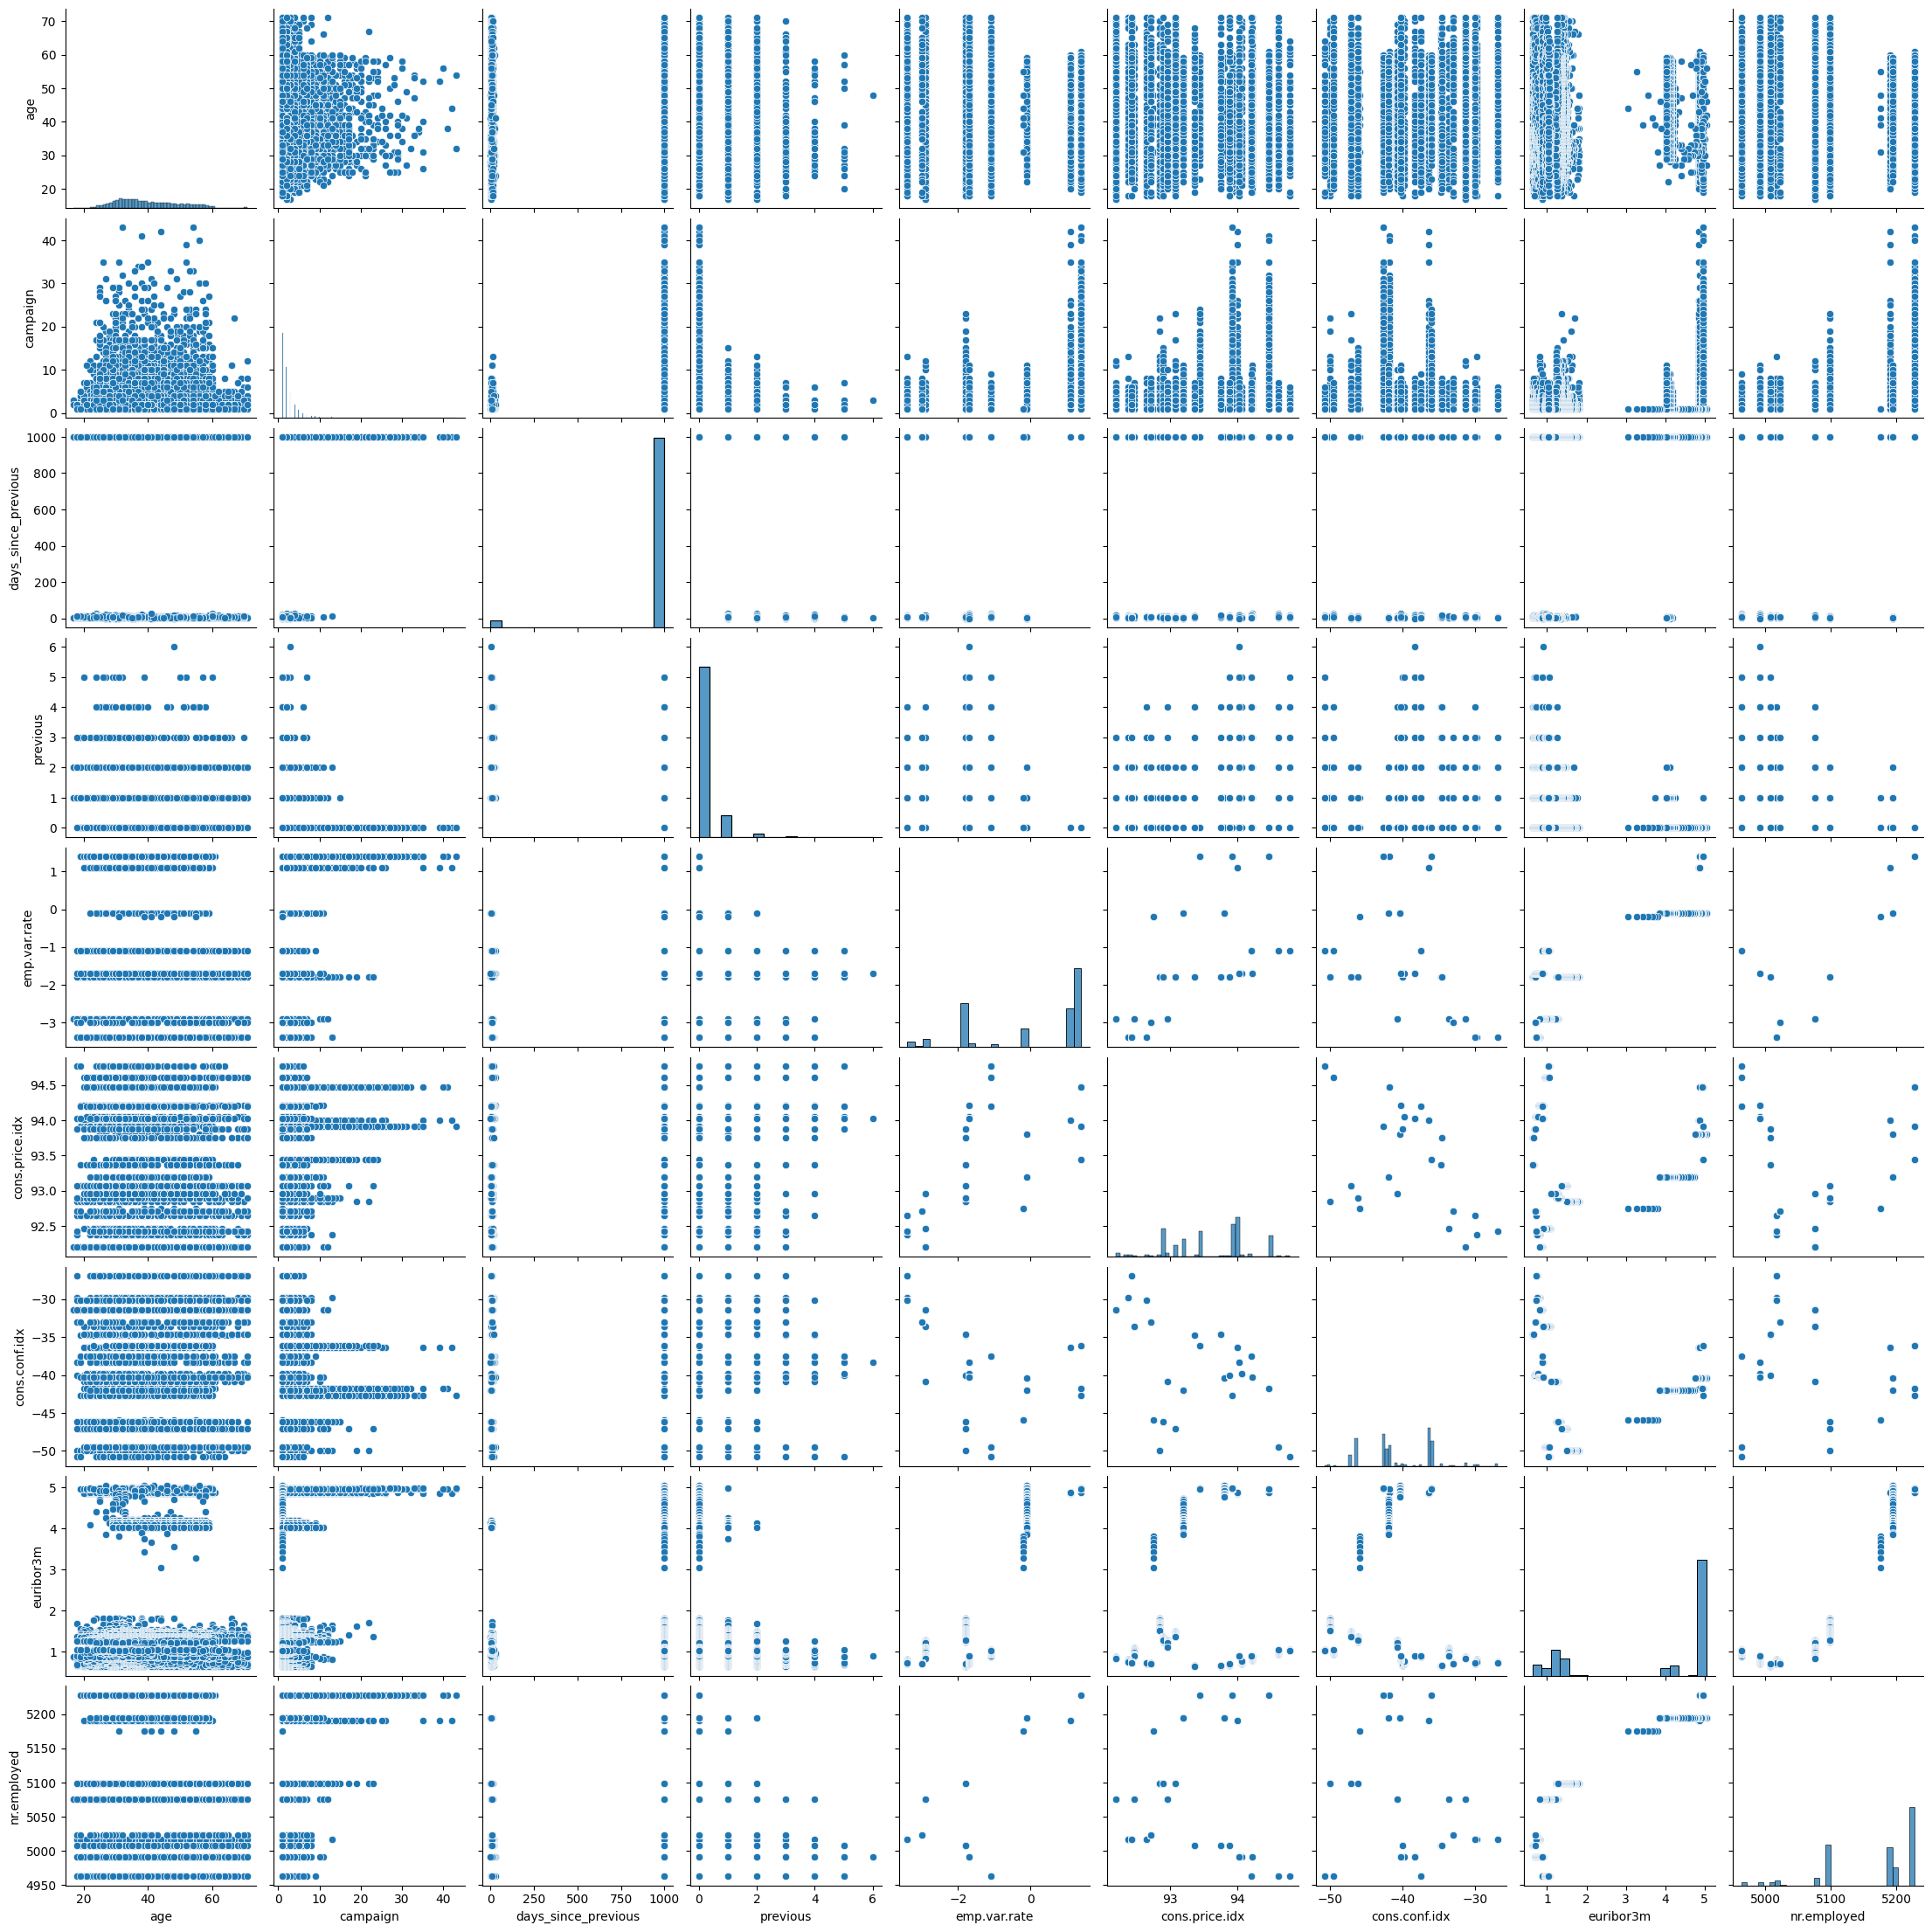

In [57]:
sns.pairplot(data[['age', 'campaign', 'days_since_previous', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']])
plt.show()

In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(data[['age', 'campaign', 'days_since_previous', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']])

In [59]:
import plotly.express as px
fig = px.scatter(data_frame=data, x='age', y='euribor3m', color='response')

In [60]:
data_numeric.drop(columns=['age_z'])

,age,duration,campaign,days_since_previous,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_numeric,education_numeric,default_numeric,housing_numeric,loan_numeric,contact_numeric,month_numeric,day_of_week_numeric,previous_outcome_numeric,response_numeric
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191,...,2,1,0,0,0,2,5,0,-1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191,...,2,4,-1,0,0,2,5,0,-1,0
2,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191,...,2,-1,-1,0,0,2,5,0,-1,0
3,25,222,1,999,0,1.1,93.994,-36.4,4.857,5191,...,3,4,0,1,0,2,5,0,-1,0
4,29,137,1,999,0,1.1,93.994,-36.4,4.857,5191,...,3,4,0,0,1,2,5,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26868,57,124,6,999,0,-1.1,94.767,-50.8,1.031,4963,...,2,6,0,1,0,1,11,3,-1,0
26869,36,254,2,999,0,-1.1,94.767,-50.8,1.028,4963,...,2,7,0,0,0,1,11,4,-1,0
26870,37,281,1,999,0,-1.1,94.767,-50.8,1.028,4963,...,2,7,0,1,0,1,11,4,-1,1
26871,29,112,1,9,1,-1.1,94.767,-50.8,1.028,4963,...,3,1,0,1,0,1,11,4,1,0


In [61]:
from sklearn.model_selection import * 
data_train, data_test = train_test_split(data_numeric, test_size = 0.25, random_state = 7)

<Axes: xlabel='Partition'>

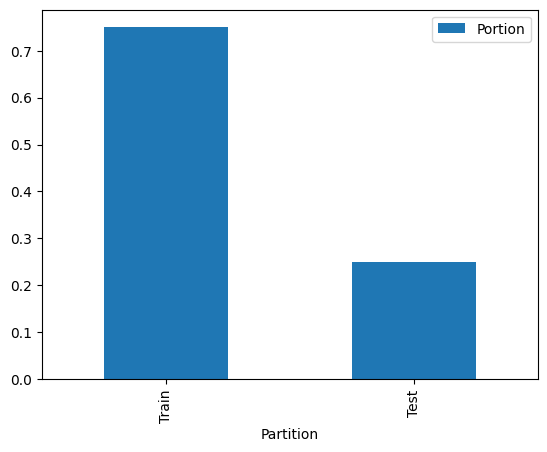

In [62]:
df = pd.DataFrame({'Partition':['Train', 'Test'],
                   'Portion':[(data_train.shape[0]/data_numeric.shape[0]), 
                              (data_test.shape[0]/data_numeric.shape[0])]})  

df.set_index('Partition').plot(kind='bar') 

In [63]:
#X_train predictor Variable
X_train = data_train.drop(columns=['response_numeric'])

#X_test predictor Variable
X_test = data_test.drop(columns=['response_numeric'])

#Y_train numerical target variable for loan status
Y_train = data_train['response_numeric']

#Y_train numerical target variable for loan status
Y_test = data_test['response_numeric']

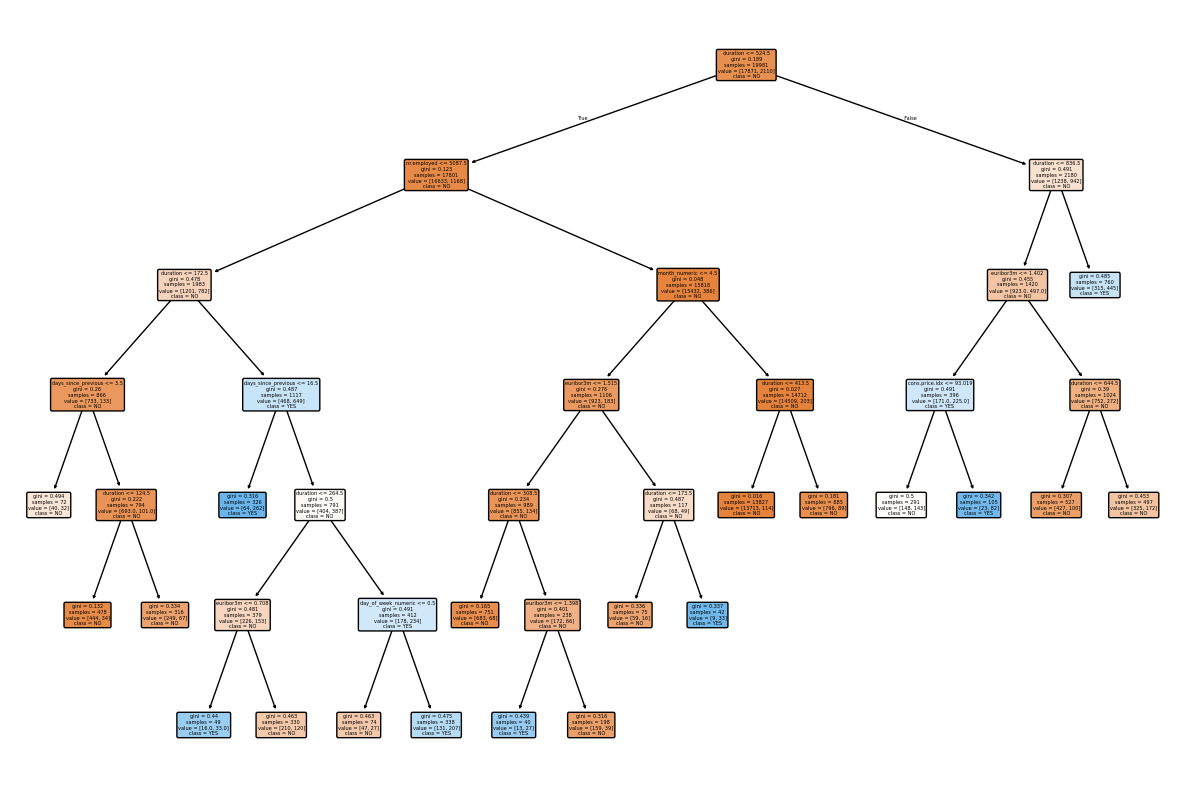

In [64]:
cart01 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=20).fit(X_train, Y_train)

plt.figure(figsize=(15,10))
plot_tree(cart01, filled=True, feature_names=X_train.columns, class_names=['NO', 'YES'], rounded=True)
plt.show()

ypred_cart = cart01.predict(X_test)

In [65]:
mse_cart = mean_squared_error(Y_test, ypred_cart)
mae_cart = mean_absolute_error(Y_test, ypred_cart)

print(f"CART Algorithm Model - Mean Squared Error: {mse_cart}")
print(f"CART Algortithm Model - Mean Absolute Error: {mae_cart}")

CART Algorithm Model - Mean Squared Error: 0.0833208226992944
CART Algortithm Model - Mean Absolute Error: 0.0833208226992944


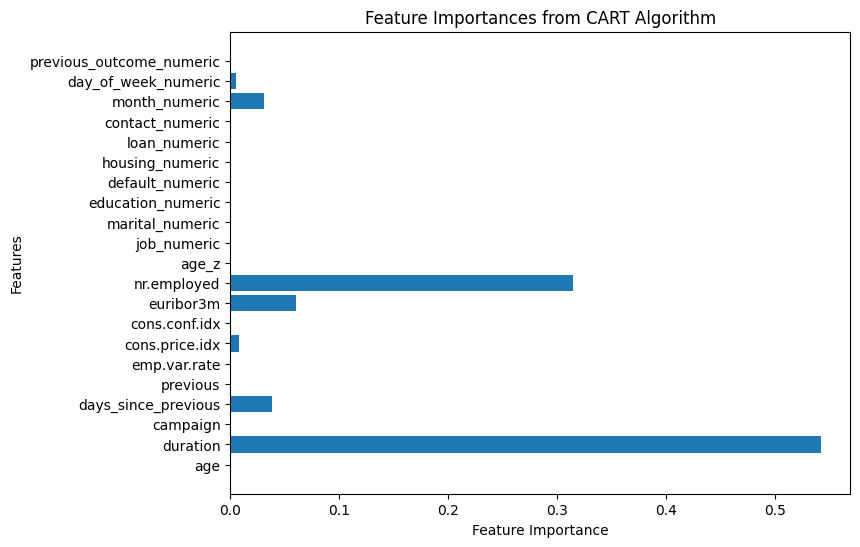

In [66]:
importance = cart01.feature_importances_

feature_names = X_train.columns

plt.figure(figsize=(8, 6))
plt.barh(range(X_train.shape[1]), importance, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names) 
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances from CART Algorithm')
plt.show()

In [67]:
rf = RandomForestClassifier(n_estimators = 100, criterion="gini").fit(X_train, Y_train)

ypred_rf = rf.predict(X_test)

In [68]:
mse_rf = mean_squared_error(Y_test, ypred_rf)
mae_rf = mean_absolute_error(Y_test, ypred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - Mean Absolute Error: {mae_rf}")

Random Forest - Mean Squared Error: 0.08527248160936796
Random Forest - Mean Absolute Error: 0.08527248160936796


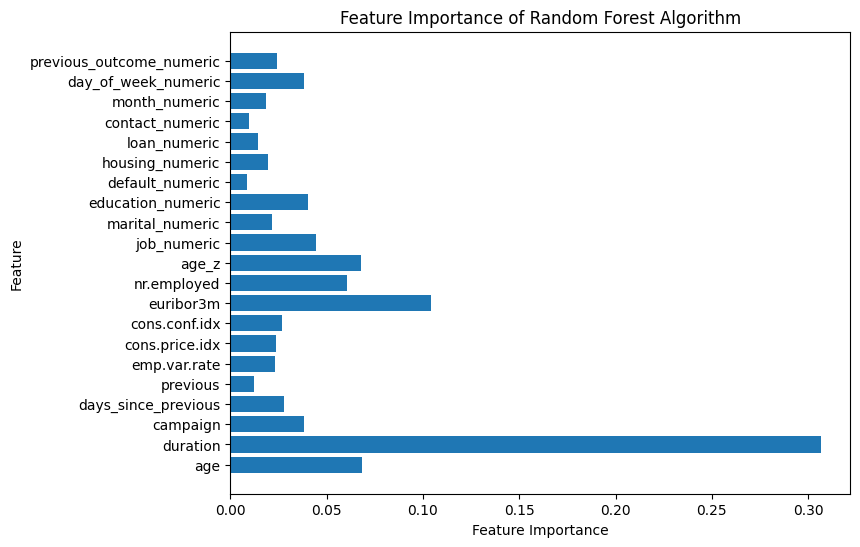

In [69]:
# Get feature importance for the Random Forest Algorithm
importance = rf.feature_importances_

#get column names
X_names = X_train.columns
feature_names = X_names

plt.figure(figsize=(8, 6))
plt.barh(range(X_train.shape[1]), importance, align='center')
plt.yticks(np.arange(X_train.shape[1]), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest Algorithm')
plt.show()

In [70]:
# add constant to X_train data set
Xtrain = sm.add_constant(X_train)

#add constant to X_test data set
Xtest = sm.add_constant(X_test)

#run Multiple Linear Regression on the training data set with Xtrain and Y_train_num
reg = sm.OLS(Y_train, Xtrain).fit()

#use Multiple Linear Regression to make predictions on Xtest
ypred_reg = reg.predict(Xtest)

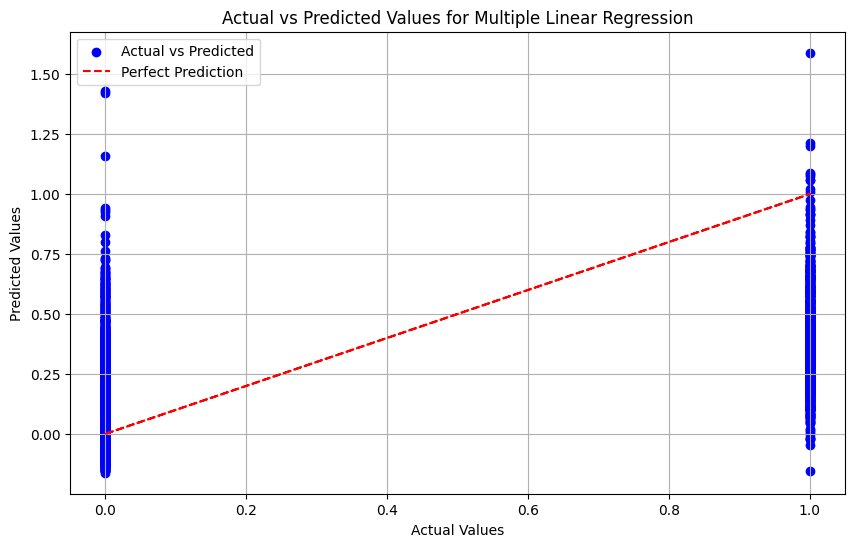

In [71]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(Y_test, ypred_reg, color='blue', label='Actual vs Predicted')

# Adding a diagonal line indicating perfect predictions
plt.plot(Y_test, Y_test, color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted Values for Multiple Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
mse_reg = mean_squared_error(Y_test, ypred_reg)
mae_reg = mean_absolute_error(Y_test, ypred_reg)

print(f"Multiple Linear Regression Model - Mean Squared Error: {mse_reg}")
print(f"Multiple Linear Regression Model - Mean Absolute Error: {mae_reg}")

Multiple Linear Regression Model - Mean Squared Error: 0.06594225762479906
Multiple Linear Regression Model - Mean Absolute Error: 0.15119383607422757


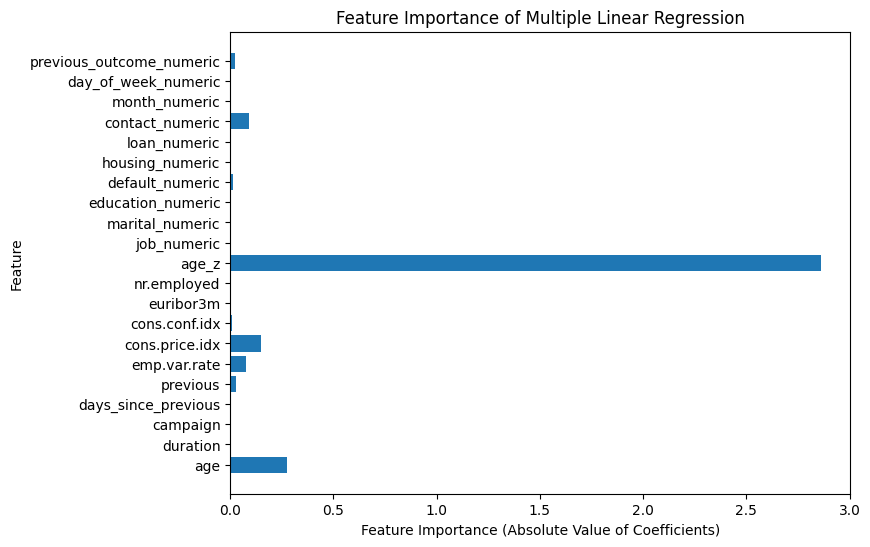

In [73]:
importance = np.abs(reg.params[1:])  # Exclude the intercept term

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(np.arange(len(importance)), feature_names)
plt.xlabel('Feature Importance (Absolute Value of Coefficients)')
plt.ylabel('Feature')
plt.title('Feature Importance of Multiple Linear Regression')
plt.show()